# COVID 19

## Part I
get confirmed and deaths for global and US

In [1]:
import numpy as np
import pandas as pd

### read data

In [2]:
pre = (
    'https://raw.githubusercontent.com/'
    'govex/COVID-19/master/data_tables/'
    'vaccine_data/us_data/time_series/')

link1 = pre + 'vaccine_data_us_timeline.csv'

raw1 = pd.read_csv(link1)

In [3]:
df1 = raw1.copy()

### drop columns

In [4]:
df1 = df1.drop(['FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)

### set types

In [5]:
df1['Date'] = df1['Date'].astype('datetime64')

### reorder

In [6]:
df1 = df1.iloc[:, [1, 0, 2, 3, 4, 5, 6, 7]]

### rename

In [7]:
df1 = df1.rename(columns={
    'Province_State': 'state',
    'Date': 'date',
    'Vaccine_Type': 'type',
    'Doses_alloc': 'allocated',
    'Doses_shipped': 'shipped',
    'Doses_admin': 'administered',
    'Stage_One_Doses': 'stage1',
    'Stage_Two_Doses': 'stage2'})

### drop rows with all NaN

In [8]:
logic = df1[['allocated', 'shipped', 'administered', 'stage1', 'stage2']].isna().all(axis=1)
df1 = df1[~logic]

### sort

In [9]:
df1 = df1.sort_values(['date', 'state'], ignore_index=True)

### inspect

In [10]:
display(df1)

,date,state,type,allocated,shipped,administered,stage1,stage2
0,2020-12-10,Florida,All,179400.0,NaN,NaN,NaN,NaN
1,2020-12-10,Florida,Pfizer,179400.0,NaN,NaN,NaN,NaN
2,2020-12-10,Florida,Unassigned,0.0,NaN,NaN,NaN,NaN
3,2020-12-11,American Samoa,All,29000.0,NaN,NaN,NaN,NaN
4,2020-12-11,American Samoa,Moderna,25100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
63802,2021-08-08,Wyoming,Janssen,NaN,34000.0,19625.0,18490.0,NaN
63803,2021-08-08,Wyoming,Pfizer,NaN,246405.0,221220.0,NaN,100747.0
63804,2021-08-08,Wyoming,Moderna,NaN,257840.0,211058.0,NaN,94766.0
63805,2021-08-08,Wyoming,All,NaN,538245.0,452145.0,245151.0,195575.0


### save

In [11]:
df1.to_csv('vax_states.csv', index=False)

## Part II
explore

In [114]:
pivot1 = pd.pivot(df1, index=['state', 'date'], columns='type')
pivot1['administered']

type                     All  Janssen   Moderna    Pfizer  Unassigned  Unknown
state   date                                                                  
Alabama 2020-12-14       NaN      NaN       NaN       NaN         NaN      NaN
        2020-12-15       NaN      NaN       NaN       NaN         NaN      NaN
        2020-12-16       NaN      NaN       NaN       NaN         NaN      NaN
        2020-12-17       NaN      NaN       NaN       NaN         NaN      NaN
        2020-12-18    5181.0      NaN       NaN    5181.0         0.0      NaN
...                      ...      ...       ...       ...         ...      ...
Wyoming 2021-08-04  447749.0  19144.0  209734.0  218633.0         0.0    238.0
        2021-08-05  447885.0  19187.0  209779.0  218681.0         0.0    238.0
        2021-08-06  451872.0  19577.0  210969.0  221084.0         0.0    242.0
        2021-08-07  451995.0  19610.0  211000.0  221143.0         0.0    242.0
        2021-08-08  452145.0  19625.0  211058.0  221220.0         0.0    242.0

[14465 rows x 6 columns]

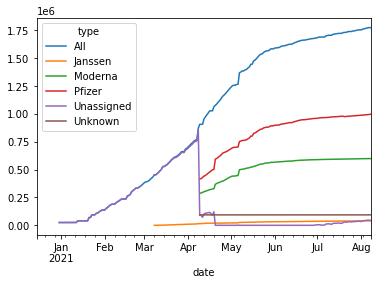

In [118]:
pivot1.loc['Hawaii', 'administered'].plot();

In [115]:
pivot2 = pivot1.swaplevel(axis=1)
pivot2['All']

allocated   shipped  administered    stage1    stage2
state   date                                                             
Alabama 2020-12-14    40950.0       NaN           NaN       NaN       NaN
        2020-12-15    40950.0       NaN           NaN       NaN       NaN
        2020-12-16    40950.0       NaN           NaN       NaN       NaN
        2020-12-17    40950.0       NaN           NaN       NaN       NaN
        2020-12-18    40950.0       NaN        5181.0    5181.0       NaN
...                       ...       ...           ...       ...       ...
Wyoming 2021-08-04        NaN  531645.0      447749.0  241992.0  194404.0
        2021-08-05        NaN  533105.0      447885.0  242146.0  194448.0
        2021-08-06        NaN  536255.0      451872.0  244866.0  195455.0
        2021-08-07        NaN  538245.0      451995.0  245030.0  195514.0
        2021-08-08        NaN  538245.0      452145.0  245151.0  195575.0

[14465 rows x 5 columns]

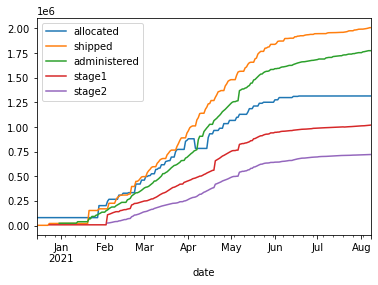

In [119]:
pivot2.loc['Hawaii', 'All'].plot();

## Part II
process data

### read

In [ ]:
covid_countries = pd.read_csv('covid_countries.csv', parse_dates=['date'])
covid_states = pd.read_csv('covid_states.csv', parse_dates=['date'])

### pivot

In [ ]:
cases_countries = covid_countries.pivot(index='date', columns='country', values='cases')
deaths_countries = covid_countries.pivot(index='date', columns='country', values='deaths')
cases_states = covid_states.pivot(index='date', columns='state', values='cases')
deaths_states = covid_states.pivot(index='date', columns='state', values='deaths')

### calculate

In [ ]:
def get_new(df): return df.diff()
def get_smooth(df): return df.rolling(28, center=True, win_type='triang').mean()

In [ ]:
new_cases_countries = get_new(cases_countries)
new_deaths_countries = get_new(deaths_countries)
new_cases_states = get_new(cases_states)
new_deaths_states = get_new(deaths_states)

smooth_new_cases_countries = get_smooth(new_cases_countries)
smooth_new_deaths_countries = get_smooth(new_deaths_countries)
smooth_new_cases_states = get_smooth(new_cases_states)
smooth_new_deaths_states = get_smooth(new_deaths_states)

## Part III
plot

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [ ]:
def format_plot(ax):
    ax.xaxis.set_major_formatter(mdates.DateFormatter(xformat))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(xlocate))
    ax.tick_params('x', labelrotation=45)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
def plot(ax, name):
    s1 = df1[name].tail(days)
    s2 = df2[name].tail(days)

    ax.plot(s1, alpha=0.25, color=color)
    ax.plot(s2, alpha=1.00, color='black')
    
    ax.set_title(name)
    ax.set_ylabel(ylabel)
    format_plot(ax)

### plot new cases

In [ ]:
Matthew Cochrancolor = 'blue'
ylabel = 'new cases'

days = 365
xformat = '%b'
xlocate = np.arange(1, 13, 1)

In [ ]:
df1 = new_cases_countries
df2 = smooth_new_cases_countries

In [ ]:
name = 'US'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

In [ ]:
Matthew Cochranname = 'United Kingdom'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

In [ ]:
Matthew Cochrandf1 = new_cases_states
df2 = smooth_new_cases_states

In [ ]:
name = 'Hawaii'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

In [ ]:
Matthew Cochranname = 'Washington'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

### plot new deaths

In [ ]:
Matthew Cochrancolor = 'red'
ylabel = 'new deaths'

days = 365
xformat = '%b'
xlocate = np.arange(1, 13, 1)

In [ ]:
df1 = new_deaths_countries
df2 = smooth_new_deaths_countries

In [ ]:
name = 'US'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

In [ ]:
Matthew Cochranname = 'United Kingdom'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

In [ ]:
Matthew Cochrandf1 = new_deaths_states
df2 = smooth_new_deaths_states

In [ ]:
name = 'California'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

In [ ]:
Matthew Cochranname = 'New York'
fig, ax = plt.subplots(1, 1)
plot(ax, name)

### subplots

In [ ]:
Matthew Cochrandef plots(plot, names):
    nnames = len(names)
    ncols = 5
    nrows = int(np.ceil(nnames/ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 2*nrows), constrained_layout=True)
        
    for i in range(nrows):
        for j in range(ncols):
            n = ncols*i + j
            if n < nnames: plot(axs[i, j], names[n])
            else: axs[i, j].axis('off')
            if j != 0: axs[i, j].set_ylabel(None)
                
    return fig

In [ ]:
days = 365
xformat = '%b'
xlocate = np.arange(1, 13, 3)

In [ ]:
color = 'blue'
ylabel = 'new cases'

In [ ]:
df1 = new_cases_countries
df2 = smooth_new_cases_countries

names = np.sort(df2.max(axis=0).sort_values(ascending=False).head(55).index)
fig = plots(plot, names)

In [ ]:
df1 = new_cases_states
df2 = smooth_new_cases_states

names = df1.columns
fig = plots(plot, names)

In [ ]:
color = 'red'
ylabel = 'new deaths'

In [ ]:
df1 = new_deaths_countries
df2 = smooth_new_deaths_countries

names = np.sort(df2.max(axis=0).sort_values(ascending=False).head(55).index)
fig = plots(plot, names)

In [ ]:
df1 = new_deaths_states
df2 = smooth_new_deaths_states

names = df1.columns
fig = plots(plot, names)